In [1]:
import numpy as np 
import torch
import os 
import re
import matplotlib.pyplot as plt
import spectrogram
#import torchaudio 


In [2]:
from scipy.io import wavfile
data_path = 'data/'
## Only Diffusiing from a single sample (TODO: Load many samples)
sample_name = os.listdir(data_path)[2]
# Specify the path to the .wav file
wav_file = os.path.join(data_path, sample_name)

# Load the .wav file as a numpy array
sample_rate, audio_data = wavfile.read(wav_file)
# Avg together Left and Right channels to get Mono Signal
audio_data = np.mean(audio_data, axis=1)
## Transform to torch tensor
audio_data = torch.from_numpy(audio_data).float().unsqueeze(0)

/tmp/ipykernel_1720/1907631780.py:9: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio_data = wavfile.read(wav_file)


In [3]:
## Import Audio for playback
from IPython.display import Audio
## TODO: Figure out why certain combinations of n_mels cause the conversion to fail
spectrogram_transforms = spectrogram.Spectrogram(
    n_fft=1024,
    win_length=1024,
    hop_length=512,
    n_mels=80,
    sample_rate=sample_rate,
)

## TODO: Add in VAE from audioldm

mel_scale = spectrogram_transforms.mel_transform(audio_data)
#reconstructed_audio = spectrogram_transforms.inverse_transform(mel_scale)

## Split the mel_scale data from 

#Audio(torch.cat((audio_data, reconstructed_audio), dim=1), rate=sample_rate)

In [4]:
## Reshape from 1x80xn to (n//1470)x80x1470
# Calculate the desired size after reshaping
N = mel_scale.size(2)
new_size = (N // 1480, 1480, 80)
remaining = N % 1480
## cut the remaining part
cut_mel_scale = mel_scale[:, :, :-remaining]
# Reshape the padded tensor
reshaped_mel_scale = cut_mel_scale.swapdims(1,2).reshape(new_size).swapdims(1,2)

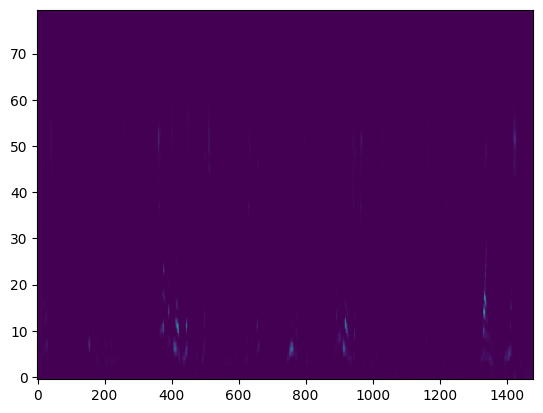

In [5]:
plt.imshow(reshaped_mel_scale[2].numpy(), aspect='auto', origin='lower')

In [6]:
## Import DDPM and model for processing data
from Models.models import Mel_Convolv
from DDPM import DDPM_Scheduler
import torch

model = Mel_Convolv(80, 1470)
test = torch.rand(1, 1, 80, 1470)
model(test)

tensor([[[[0.1121, 0.1207, 0.1038,  ..., 0.1885, 0.1259, 0.1349],
          [0.1135, 0.0686, 0.1184,  ..., 0.1542, 0.1470, 0.0792],
          [0.1211, 0.1650, 0.1185,  ..., 0.1370, 0.1401, 0.0813],
          ...,
          [0.1250, 0.1531, 0.1418,  ..., 0.1319, 0.0719, 0.0932],
          [0.1635, 0.0858, 0.1269,  ..., 0.0579, 0.1255, 0.1263],
          [0.0827, 0.1464, 0.0897,  ..., 0.1457, 0.1324, 0.1457]]]],
       grad_fn=<ConvolutionBackward0>)